In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uae-used-car-prices-and-features-10k-listings/uae_used_cars_10k.csv


In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor, HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("/kaggle/input/uae-used-car-prices-and-features-10k-listings/uae_used_cars_10k.csv")
df.head(5)

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description
0,toyota,camry,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai,"2016 toyota camry with Rear camera, Leather se..."
1,kia,sorento,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi,"2013 kia sorento with Sunroof, Adaptive cruise..."
2,mini,cooper,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Dubai,"2023 mini cooper with Adaptive cruise control,..."
3,nissan,altima,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,"2016 nissan altima with Rear camera, Adaptive ..."
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai,2020 toyota land-cruiser-76-series with Adapti...


In [4]:
df=df.drop(["Location","Description"],axis=1)
df.head(5)

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color
0,toyota,camry,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black
1,kia,sorento,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey
2,mini,cooper,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey
3,nissan,altima,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          10000 non-null  object
 1   Model         10000 non-null  object
 2   Year          10000 non-null  int64 
 3   Price         10000 non-null  int64 
 4   Mileage       10000 non-null  int64 
 5   Body Type     10000 non-null  object
 6   Cylinders     9895 non-null   object
 7   Transmission  10000 non-null  object
 8   Fuel Type     10000 non-null  object
 9   Color         10000 non-null  object
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


In [6]:
df.describe()

,Year,Price,Mileage
count,10000.000000,1.000000e+04,10000.000000
mean,2014.472800,2.452345e+05,155161.871700
std,5.790839,4.709773e+05,83681.858983
min,2005.000000,7.183000e+03,10006.000000
25%,2009.000000,5.035250e+04,82904.000000
50%,2014.000000,1.027660e+05,154370.500000
75%,2019.000000,2.312480e+05,227551.250000
max,2024.000000,1.468698e+07,299996.000000


In [7]:
df.isnull().sum()

Make              0
Model             0
Year              0
Price             0
Mileage           0
Body Type         0
Cylinders       105
Transmission      0
Fuel Type         0
Color             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
le=LabelEncoder()
df["Make"]=le.fit_transform(df["Make"])
df["Model"]=le.fit_transform(df["Model"])
df["Body Type"]=le.fit_transform(df["Body Type"])
df["Cylinders"]=le.fit_transform(df["Cylinders"])
df["Transmission"]=le.fit_transform(df["Transmission"])
df["Fuel Type"]=le.fit_transform(df["Fuel Type"])
df["Color"]=le.fit_transform(df["Color"])





In [10]:
 df.fillna(df.mean(), inplace=True)

df.isnull().sum()


Make            0
Model           0
Year            0
Price           0
Mileage         0
Body Type       0
Cylinders       0
Transmission    0
Fuel Type       0
Color           0
dtype: int64

In [11]:
df.corr()

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color
Make,1.000000,0.083009,0.003577,0.026854,-0.014179,0.027882,-0.068577,0.121640,-0.114963,0.095826
Model,0.083009,1.000000,0.000513,-0.043365,-0.014644,0.064827,0.160538,0.031917,-0.009911,0.002695
Year,0.003577,0.000513,1.000000,0.000188,-0.017118,0.004301,-0.005454,0.000835,0.022110,0.005176
Price,0.026854,-0.043365,0.000188,1.000000,0.010685,-0.040483,-0.046602,-0.053886,0.037254,-0.069367
Mileage,-0.014179,-0.014644,-0.017118,0.010685,1.000000,-0.006042,-0.015559,0.001402,0.008180,-0.017699
Body Type,0.027882,0.064827,0.004301,-0.040483,-0.006042,1.000000,-0.018337,-0.004496,-0.011657,0.027643
Cylinders,-0.068577,0.160538,-0.005454,-0.046602,-0.015559,-0.018337,1.000000,-0.085377,-0.046012,-0.049736
Transmission,0.121640,0.031917,0.000835,-0.053886,0.001402,-0.004496,-0.085377,1.000000,-0.184006,0.085695
Fuel Type,-0.114963,-0.009911,0.022110,0.037254,0.008180,-0.011657,-0.046012,-0.184006,1.000000,-0.015098
Color,0.095826,0.002695,0.005176,-0.069367,-0.017699,0.027643,-0.049736,0.085695,-0.015098,1.000000


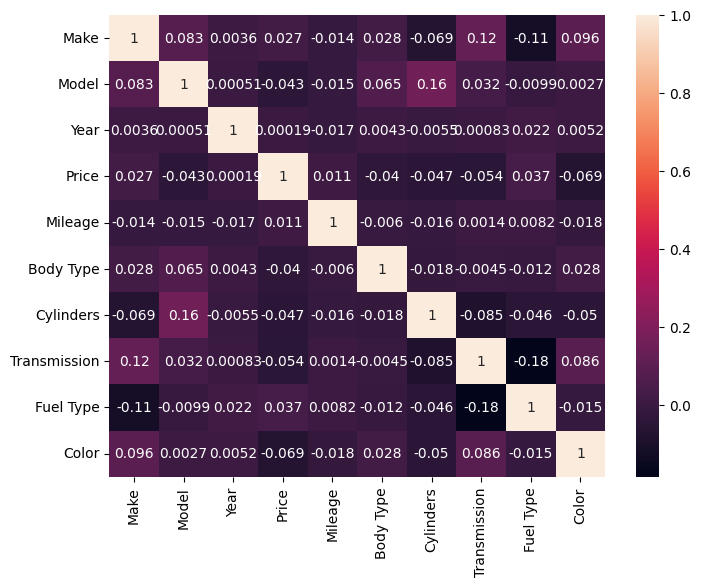

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "SGD Regressor": SGDRegressor(),
    "Huber Regressor": HuberRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "TheilSen Regressor": TheilSenRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
}

In [14]:
y=df["Price"]
x=df.drop(["Price"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [15]:
metrics = {
    'Model': [],
    'Accuracy': []
}

In [16]:
for name,model in models.items():
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    acc = r2_score(y_test, predict)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print("-" * 30)

Model: Random Forest Regressor
Accuracy: 49.064300564263206
------------------------------
Model: Gradient Boosting Regressor
Accuracy: 49.08972561679401
------------------------------
Model: AdaBoost Regressor
Accuracy: 20.169837469267126
------------------------------
Model: Bagging Regressor
Accuracy: 48.410124981124405
------------------------------
Model: Extra Trees Regressor
Accuracy: 81.21273292520198
------------------------------
Model: Linear Regression
Accuracy: 0.7455149204297573
------------------------------
Model: Ridge Regression
Accuracy: 0.7456083609269859
------------------------------
Model: Lasso Regression
Accuracy: 0.7455305470454032
------------------------------
Model: ElasticNet Regression
Accuracy: 0.8269255018865995
------------------------------
Model: Bayesian Ridge Regression
Accuracy: 0.7872270488889499
------------------------------
Model: SGD Regressor
Accuracy: 0.9205062210795645
------------------------------
Model: Huber Regressor
Accuracy: -5.9454

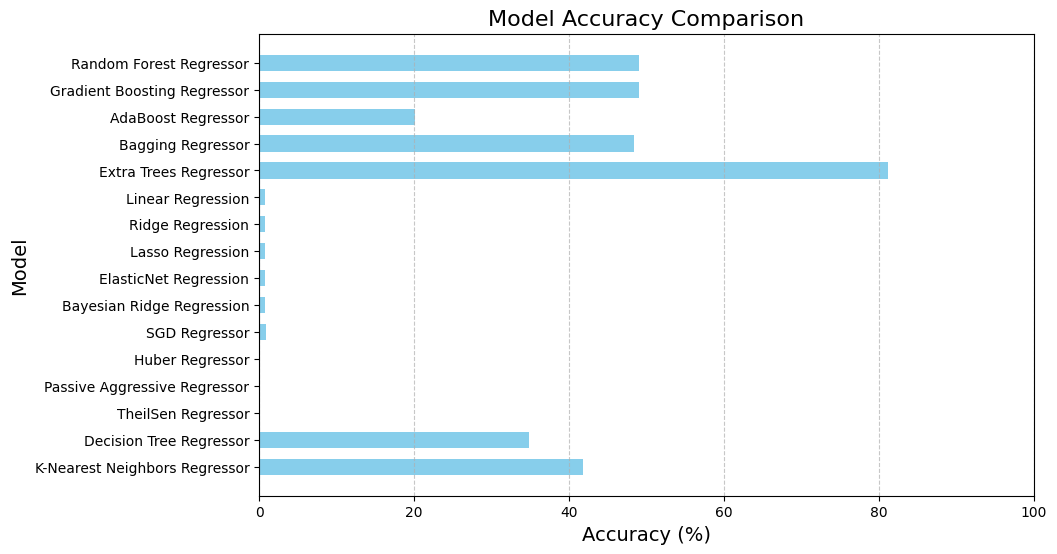

In [17]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(10, 6))
plt.barh(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue', height=0.6) 
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xlim(0, 100)  
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.gca().invert_yaxis() 
plt.show()